# **Program untuk mendeteksi digit dari plat nomor motor**

## **Install Library**

In [6]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [9]:
!pip install easyocr ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 22.9 MB/s eta 0:00:00


> fungsi dibawah ini digunakan untuk melakukan klasifikasi setiap karakter yang telah terpotong, prediksi yang didapatkan akan dimasukan ke dalam array dan ditampilkan pada gambar awal.

## **Model Deteksi**

In [4]:
# unzip data runs
import zipfile
with zipfile.ZipFile('runs_yolo8.zip', 'r') as zip_ref:
    zip_ref.extractall('runs_yolo8')  # folder tujuan ekstrak

In [3]:
with zipfile.ZipFile('runs_yolo8_karakter.zip', 'r') as zip_ref:
    zip_ref.extractall('runs_yolo8_karakter')  # folder tujuan ekstrak

Saving H6008EL.jpg to H6008EL.jpg

image 1/1 /content/H6008EL.jpg: 480x640 1 plat_nomor, 166.7ms
Speed: 4.2ms preprocess, 166.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 352x640 2 0s, 1 6, 1 8, 1 E, 1 H, 1 L, 131.7ms
Speed: 3.0ms preprocess, 131.7ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


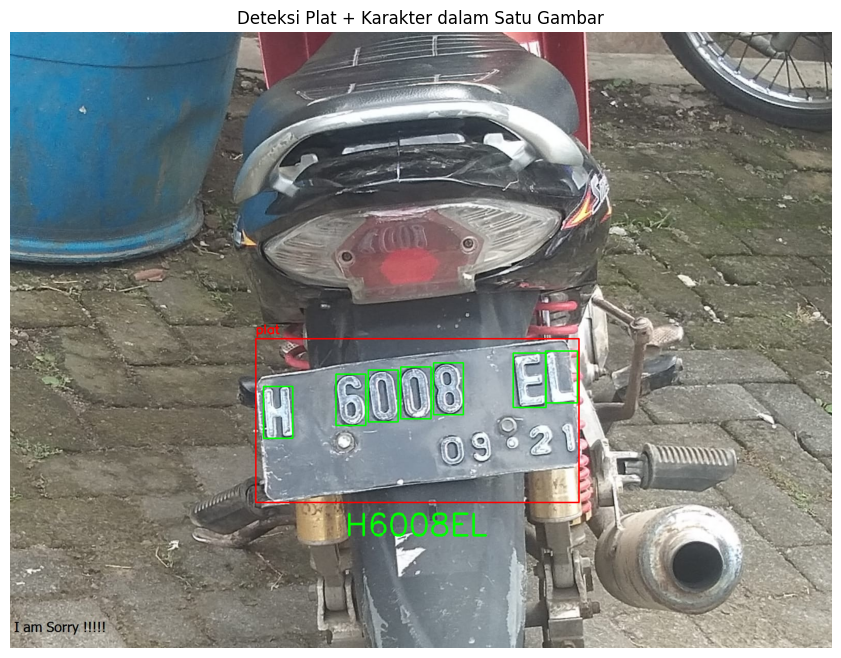

Plat Nomor Terdeteksi: H6008EL


In [23]:
# Upload file gambar
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load YOLO
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model YOLO plat & karakter
model_plat = YOLO("runs_yolo8/runs/detect/yolo8-plat/weights/best.pt")  # deteksi plat
model_char = YOLO("runs_yolo8_karakter/runs/detect/yolo8-plat2/weights/best.pt")  # deteksi karakter

# Deteksi plat
results_plat = model_plat.predict(source=file_name, conf=0.25, save=False)
img = cv2.imread(file_name)

# Copy gambar untuk digambar hasil akhir
img_final = img.copy()

plate_number_final = "" # Untuk menyimpan plat nomor hasil deteksi
plate_box_info = None # Untuk menyimpan koordinat plat pertama yang terdeteksi

for box in results_plat[0].boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)

    # Simpan informasi plat pertama (asumsi hanya ada satu plat di gambar)
    if plate_box_info is None:
        plate_box_info = {"x1": x1, "y1": y1, "x2": x2, "y2": y2}

    # Crop plat
    plat_crop = img[y1:y2, x1:x2]

    # Deteksi karakter
    results_char = model_char.predict(plat_crop, conf=0.5, save=False)

    detected_chars = []
    for char_box, char_cls, char_conf in zip(
        results_char[0].boxes.xyxy.cpu().numpy(),
        results_char[0].boxes.cls.cpu().numpy(),
        results_char[0].boxes.conf.cpu().numpy()
    ):
        cx1, cy1, cx2, cy2 = char_box
        # Posisi di gambar asli
        cx1_orig = cx1 + x1
        cy1_orig = cy1 + y1
        cx2_orig = cx2 + x1
        cy2_orig = cy2 + y1

        char_label = results_char[0].names[int(char_cls)]
        detected_chars.append({"char": char_label, "x": cx1_orig, "y": cy1_orig, "conf": char_conf})

        # Gambar kotak karakter (tanpa label per karakter di atasnya)
        cv2.rectangle(img_final, (int(cx1_orig), int(cy1_orig)), (int(cx2_orig), int(cy2_orig)), (0, 255, 0), 2)

    # Urutkan karakter berdasarkan koordinat X untuk membentuk plat nomor
    detected_chars_sorted = sorted(detected_chars, key=lambda k: k['x'])
    plate_number = "".join([d['char'] for d in detected_chars_sorted])
    plate_number_final = plate_number # Simpan untuk ditampilkan di luar loop

    # Gambar kotak plat
    cv2.rectangle(img_final, (x1, y1), (x2, y2), (0,0,255), 2)
    cv2.putText(img_final, "plat", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

# ---- Bagian untuk menampilkan teks plat nomor secara simetris di bawah plat ----
if plate_box_info:
    plat_x1 = plate_box_info['x1']
    plat_y2 = plate_box_info['y2']
    plat_width = plate_box_info['x2'] - plate_box_info['x1']

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2 # Ukuran font
    font_thickness = 4 # Ketebalan font

    # Hitung ukuran teks plat nomor
    (text_width, text_height), baseline = cv2.getTextSize(plate_number_final, font, font_scale, font_thickness)

    # Hitung posisi X agar teks simetris di tengah plat
    text_x_final = plat_x1 + (plat_width - text_width) // 2

    # Tentukan posisi Y di bawah plat
    text_y_final = plat_y2 + text_height + 20 # 20 piksel di bawah plat

    # Pastikan teks tidak keluar dari gambar (opsional, jika khawatir)
    if text_y_final > img_final.shape[0] - 10:
        text_y_final = img_final.shape[0] - 10
    if text_x_final < 0:
        text_x_final = 10 # Sedikit padding dari kiri

    # Tampilkan hasil plat nomor
    cv2.putText(img_final, plate_number_final, (text_x_final, text_y_final), font, font_scale, (0, 255, 0), font_thickness)

# Tampilkan hasil akhir
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Deteksi Plat + Karakter dalam Satu Gambar")
plt.show()

print(f"Plat Nomor Terdeteksi: {plate_number_final}")

# **Kesimpulan**

### **Penjelasan Proyek Deteksi Digit Plat Nomor Motor Menggunakan Dua Model**

Proyek ini bertujuan untuk membangun sistem deteksi digit pada plat nomor motor dengan memanfaatkan dua tahap deteksi berbasis *You Only Look Once* (YOLO). Sistem ini dirancang agar mampu mendeteksi area plat nomor terlebih dahulu, kemudian mengenali digit atau karakter di dalam plat tersebut secara terpisah, sehingga meningkatkan akurasi dan keandalan deteksi.

#### **Tahap 1 — Deteksi Plat Nomor**

Pada tahap awal, sistem menggunakan model YOLOv8 yang dilatih khusus untuk mendeteksi posisi plat nomor pada gambar kendaraan bermotor. Model ini akan menghasilkan bounding box (kotak deteksi) yang membatasi area plat nomor.
Output dari tahap ini berupa koordinat lokasi plat nomor yang kemudian diekstraksi untuk proses selanjutnya.

#### **Tahap 2 — Deteksi Karakter / Digit**

Setelah plat nomor terdeteksi dan dipotong (crop), gambar plat nomor tersebut menjadi masukan untuk model YOLOv8 kedua yang didesain untuk mendeteksi digit dan huruf satu per satu. Model ini mendeteksi posisi setiap karakter pada plat motor secara detail, sekaligus mengklasifikasikannya ke dalam label 0–9 atau A–Z.
Hasil dari tahap ini berupa urutan digit/huruf yang membentuk nomor plat kendaraan.

#### **Alur Sistem**

* Gambar kendaraan → **Model 1**: Deteksi plat nomor → Crop plat nomor
* Crop plat nomor → **Model 2**: Deteksi karakter → Ekstraksi digit/huruf

#### **Keunggulan Pendekatan Dua Model**

**Lebih presisi**: Pemisahan tugas deteksi plat dan karakter mengurangi noise dari lingkungan sekitar kendaraan.
**Fleksibel**: Sistem dapat dikembangkan untuk plat nomor dengan format berbeda.
**Mudah dioptimasi**: Kedua model dapat dilatih dan dioptimasi secara terpisah sesuai kebutuhan data.

#### **Implementasi**

Sistem ini dapat diterapkan untuk:

* Gerbang parkir otomatis
* Sistem tilang elektronik (ETLE)
* Aplikasi monitoring kendaraan di area tertentu